In [1]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

import time

In [2]:
from fastai.vision.utils import download_images, resize_images

searches: tuple[str, str] = 'forest', 'bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path / o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path / o, max_size=400, dest=path / o)

In [3]:
from fastai.data.transforms import get_image_files
from fastai.vision.utils import verify_images

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

11

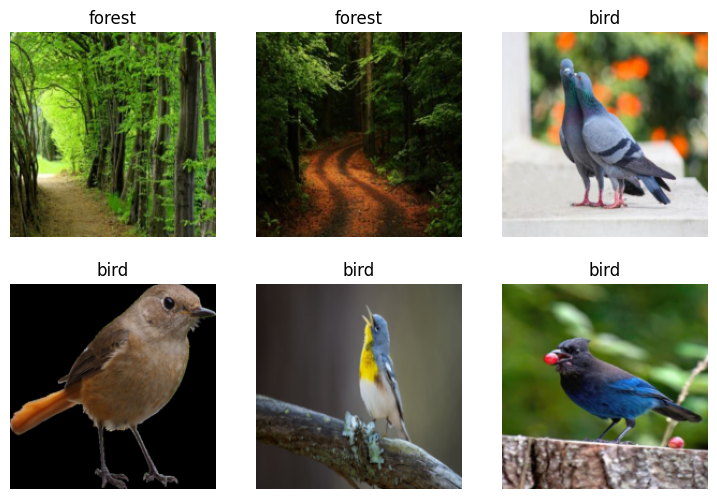

In [4]:
from fastai.vision.augment import Resize
from fastai.data.transforms import RandomSplitter, parent_label
from fastai.vision.data import ImageBlock
from fastai.data.block import DataBlock, CategoryBlock

dls = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [9]:
from fastai.vision.learner import vision_learner
from fastai.metrics import error_rate
from torchvision.models import resnet18

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fit(3)

[0, 0.23809607326984406, 0.0019237538799643517, 0.0, '00:05']
[1, 0.1107940599322319, 0.000815188919659704, 0.0, '00:05']
[2, 0.06843741238117218, 0.003327986691147089, 0.0, '00:05']
